## Исследование данных о российском кинопрокате



**Описание проекта**

Заказчик этого исследования — Министерство культуры Российской Федерации. 

Нужно изучить рынок российского кинопроката и выявить текущие тренды, а также сделать анализ насколько фильмы, которые получили государственную поддержку, интересны зрителю. 

**Описание данных**

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 
* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

In [1]:
import pandas as pd

In [2]:
data_movies = pd.read_csv('/datasets/mkrf_movies.csv')

In [3]:
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [4]:
data_movies

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_shows

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
...,...,...
3153,224014814,1.530000e+03
3154,224021411,9.270000e+03
3155,224022410,4.000000e+02
3156,224023210,3.600000e+02


In [6]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [7]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [8]:
data_movies.query('puNumber.str.isdigit() == False')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_movies.loc[804, 'puNumber']

' 111004112'

In [10]:
data_movies['puNumber'] = data_movies['puNumber'].str.strip(' ')


In [11]:
data_movies = data_movies.query('puNumber.str.isdigit() == True').reset_index(drop=True)

In [12]:
data_movies['puNumber'] = data_movies['puNumber'].astype('int')

In [13]:
data = data_movies.merge(data_shows, on='puNumber', how='outer')

In [14]:
data

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вывод: Были соединены две таблицы по столбцу 'puNumber', в котором предварительно были заменены или удалены аномальные значения, также столбец был переведен в целочисленный тип.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [16]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [17]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [18]:
data['ratings'] = data['ratings'].str.rstrip('%').astype(float)

In [19]:
data['ratings'] = data['ratings'].where(data['ratings'] < 10, data['ratings'] / 10)

Вывод: Был заменен тип данных в стоблце 'show_start_date' на тип datetime. Также был заменен тип данных на целочисленный в столбце 'ratings', в котором предварительно были заменены аномальные значения.

#### Шаг 2.2. Изучим пропуски в датафрейме

In [20]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

In [21]:
columns_to_replace = ['film_studio', 'production_country', 'director', 'producer', 'genres']
for name in columns_to_replace:
    data[name] = data[name].fillna('unknown')

In [22]:
data.corr()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
puNumber,1.000000,0.010413,-0.030194,-0.019794,0.137539,-0.020413
refundable_support,0.010413,1.000000,0.359622,0.641224,-0.003797,0.312137
nonrefundable_support,-0.030194,0.359622,1.000000,0.594169,0.125646,0.455729
budget,-0.019794,0.641224,0.594169,1.000000,0.093117,0.361325
ratings,0.137539,-0.003797,0.125646,0.093117,1.000000,0.087230
box_office,-0.020413,0.312137,0.455729,0.361325,0.087230,1.000000


Вывод: Были заменены пропуски в столбцах 'film_studio', 'production_country', 'director', 'producer', 'genres' на 'unknown'. Логичной замены не было приведено для пропусков в столбцах 'ratings' и 'box_office', оставим их пустыми. Пропуски могли возникнуть по причине того, что не были заполнены нужные графы. Пропуски в столбцах 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source' возникли по причине того, что в данных строках записывались данные только для фильмов, финансируемых государством, поэтому заполнять их не нужно.

#### Шаг 2.3. Изучим дубликаты в датафрейме

In [23]:
data.duplicated().sum()

0

In [24]:
data.duplicated(subset=['puNumber', 'box_office']).sum()

2

In [25]:
data = data.drop_duplicates(subset=['puNumber', 'box_office']).reset_index(drop=True)

Вывод: Были удалены явные дубликаты.

#### Шаг 2.4. Изучим категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.

In [26]:
def check_bad_values(column):
    return column.sort_values().unique().tolist()

In [27]:
check_bad_values(data['title'])

[' Я ПРЕПОД',
 '"SOS" над тайгой',
 '"V" значит вендетта',
 '"АРТиШОК" анимационный альманах авторских фильмов',
 '"Бежин луг" Сергея Эйзенштейна',
 '"Державная" Размышления 100 лет спустя',
 '"Зеленое яблоко" анимационный альманах выпуск № 7',
 '"Машины песенки". Серия "Опять Новый Год!"',
 '"Море"',
 '"Сезон дождей", "Диета Матроскина", "Шарик хочет телефон" из анимационного сериала "Простоквашино"',
 '"Старый" Новый год',
 '"Уорнер Бразерс Пикчерз" и "Леджендари Пикчерз": Тихоокеанский рубеж',
 '"Фееринки". Серия "Фантик спешит на помощь"',
 '"Хороший день", "Бог из машины/Deus EX", "Голод", "Психотроника", "Темная ночь"',
 '"Чудовище из Простоквашино", "Ген героя", "Ненастоящий детектив", "Мама и Тама", "Как бы не стало зимы" из анимационного сериала "Простоквашино"',
 '#ВСЁ_ИСПРАВИТЬ!?!',
 '#Москва-Руаян',
 '#ЯВОЛОНТЕР Истории неравнодушных',
 '(Не)жданный принц',
 '(Не)идеальный мужчина',
 '... в стиле JAZZ',
 '... и я там был',
 '... имени Сергея Герасимова',
 '007 Координаты Ск

In [28]:
check_bad_values(data['type'])

[' Анимационный',
 ' Художественный',
 'Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный']

In [29]:
check_bad_values(data['film_studio'])

[' АНО "Кинофорум"',
 ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
 ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
 ' Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм ',
 ' ООО "АВАТАРА"',
 ' ООО "КОСТАФИЛЬМ"',
 ' ООО "КиноФирма"',
 ' ООО "Кинокомпания "Студия ПРЕССИНГ"',
 ' ООО "Магнум-фильм"',
 ' ООО "Продюсерская фирма Игоря Толстунова"',
 ' ООО "Студия "Рой"',
 ' ООО "Студия 25", ООО "Медиа Арт Студио", ООО "Продюсерский центр "Синема Продакшн" ',
 ' ООО "Студия МЕТРАФИЛЬМС", Компания "TASSE film", Компания "SIRENA film"',
 ' ООО "ТаББаК"',
 ' ООО "ТаББаК", ООО "Анимационная студия "Москва"',
 ' ООО "ТаББаК", ООО "Весёлая Компания"',
 ' ООО "Форс Медиа"',
 ' ООО "Хардкор", ООО "Патриот продакшнс"',
 ' ООО "Энджой мувиз"',
 ' ООО "Энджой мувиз", ООО "Эмоушен Пикчерз", ООО "РЕНОВАЦИО интертейнмент"',
 ' ООО Продюсерский центр "Фёдор Добронравов"',
 ' Юниверсал Пикчерз',


In [30]:
check_bad_values(data['production_country'])

[' СССР',
 ' СССР ',
 ' СССР   ',
 '2019',
 'CША',
 'unknown',
 'Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия -

In [31]:
check_bad_values(data['director'])

[' Йохан Нийенхейс',
 ' Н.Орлов, Р.Быков',
 ' Р.Асхаев',
 ' Т.Саакян',
 ' Ф.Бондарчук',
 'unknown',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)',
 'А.Алов, В.Наумов',
 'А.Аманшаев, Г.Шенгелия',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян, В.Рейнгеверц',
 'А.Андрианов',
 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано ',
 'А.Анненский',
 'А.Аравин',
 'А.Аравин, А.Прошкин',
 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян, А.Коршунов',
 'А.Атанесян',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Баршак',
 'А.Барщевский, И.Матвеев',
 'А.Барыкин',
 'А.Б

In [32]:
check_bad_values(data['producer'])

[' А.Шальопа',
 ' Г.Шпригов',
 ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
 ' И.Гелашвили',
 ' К.Шахназаров, А.Златопольский',
 ' Мишель Чиджик, Джефф Абберли, Натали Марисано',
 ' ООО "Арт Пикчерс Студия"',
 ' ООО "Арт Пикчерс Студия", ФГУП "ВГТРК"',
 ' ООО "КиноФирма"',
 ' ФГУП "Киноконцерн "Мосфильм"',
 '"Фонд Михаила Калатозова"',
 'unknown',
 'Ёсиаки Нисимура, Джеффри Уэкслер',
 'А. Калюжный',
 'А. Натахин',
 'А.А.Эшпай',
 'А.Аболс',
 'А.Адамская',
 'А.Адраникян, В.Горяинов',
 'А.Ананикян',
 'А.Ананикян, Г.Андреасян, С.Андреасян',
 'А.Ананикян, С.Андреасян, Г.Андреасян',
 'А.Аствацатрян, С.Сельянов',
 'А.Атанесян, А.Кириллин, Л.Тарасов',
 'А.Атанесян, М.Бабаханов, Р.Бутко',
 'А.Атанесян, Р.Атоян',
 'А.Балашов',
 'А.Барыкин',
 'А.Барыкин, В.Братухин, О.Суров',
 'А.Басов',
 'А.Белов',
 'А.Берденников',
 'А.Бессчетнова, М.Евдокимова, А.Куренков',
 'А.Бзаров',
 'А.Бик, П.Бранкати, Ф.Будвег, М.де Конинг, П.А.Марион, Г.Мендеш, М.Сит

In [33]:
check_bad_values(data['age_restriction'])

['«0+» - для любой зрительской аудитории',
 '«12+» - для детей старше 12 лет',
 '«16+» - для детей старше 16 лет',
 '«18+» - запрещено для детей',
 '«6+» - для детей старше 6 лет']

In [34]:
check_bad_values(data['financing_source'])

['Министерство культуры', 'Министерство культуры, Фонд кино', 'Фонд кино', nan]

In [35]:
check_bad_values(data['genres'])

['unknown',
 'аниме,мультфильм',
 'аниме,мультфильм,боевик',
 'аниме,мультфильм,детектив',
 'аниме,мультфильм,драма',
 'аниме,мультфильм,комедия',
 'аниме,мультфильм,короткометражка',
 'аниме,мультфильм,мелодрама',
 'аниме,мультфильм,приключения',
 'аниме,мультфильм,ужасы',
 'аниме,мультфильм,фантастика',
 'аниме,мультфильм,фэнтези',
 'биография',
 'биография,военный,драма',
 'биография,документальный',
 'биография,драма',
 'биография,драма,военный',
 'биография,драма,история',
 'биография,драма,криминал',
 'биография,история',
 'биография,история,драма',
 'биография,криминал,драма',
 'биография,криминал,триллер',
 'биография,мелодрама,драма',
 'биография,музыка,драма',
 'биография,музыка,мюзикл',
 'биография,спорт,драма',
 'биография,спорт,история',
 'биография,спорт,комедия',
 'боевик',
 'боевик,вестерн,приключения',
 'боевик,военный',
 'боевик,военный,драма',
 'боевик,военный,история',
 'боевик,детектив',
 'боевик,драма',
 'боевик,драма,биография',
 'боевик,драма,вестерн',
 'боевик,

In [36]:
columns_to_strip = ['title', 'type', 'film_studio', 'production_country', 'director', 'producer']
for name in columns_to_strip:
    data[name] = data[name].str.strip('._- \t')

Вывод: Были убраны аномалии в начале и конце строк в стоблцах 'title', 'type', 'film_studio', 'production_country', 'director', 'producer'.

#### Шаг 2.5. Проверим количественные значения

In [37]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.483000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6517.000000,3.158000e+03
mean,1.351736e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.487955,7.647870e+07
std,3.833231e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.114717,2.403531e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120251e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210154e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09


In [38]:
(data['refundable_support'] + data['nonrefundable_support'] > data['budget']).sum()

17

In [39]:
data = data.query('refundable_support + nonrefundable_support <= budget | budget.isna() | refundable_support.isna() | nonrefundable_support.isna()')

Вывод: Были убраны строки, в которых встречались аномалии: суммарная гос. поддержка некоторых фильмов привышала их бюджет. 

#### Шаг 2.6. Добавим новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [40]:
data['year_start_date'] = data['show_start_date'].dt.year

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [41]:
def add_column(column):
    return column.str.split(',').str.get(0)  

In [42]:
data['one_director'] = add_column(data['director'])

In [43]:
data['one_genres'] = add_column(data['genres'])

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [44]:
data['support_ratio'] = (data['nonrefundable_support'] + data['refundable_support']) / data['budget']

Вывод: Были добавлены новые столбцы: 'year_start_date', 'one_director', 'one_genres', 'support_ratio'.

### Шаг 3. Проведем исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

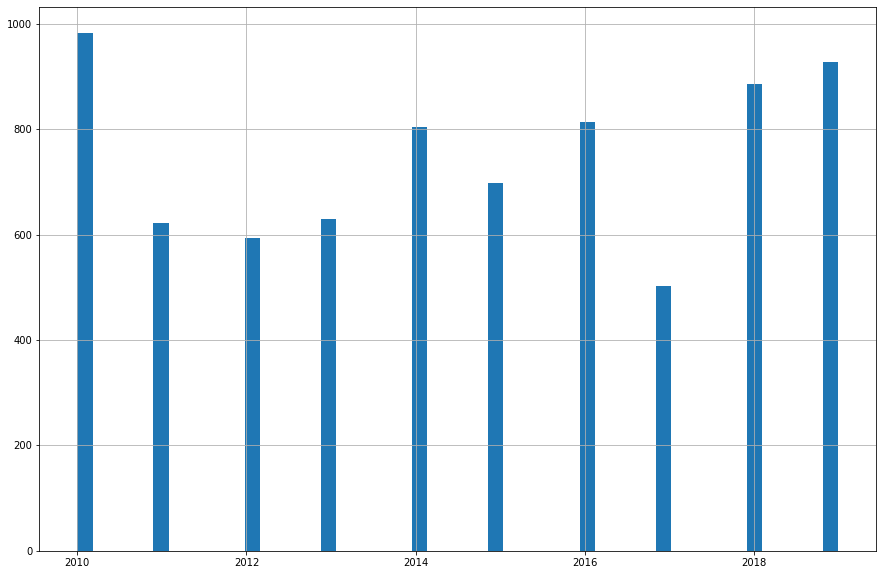

In [45]:
data['year_start_date'].hist(bins=50, figsize=(15, 10));

In [46]:
1 - data['box_office'].isna().sum() / len(data)

0.4207072060005358

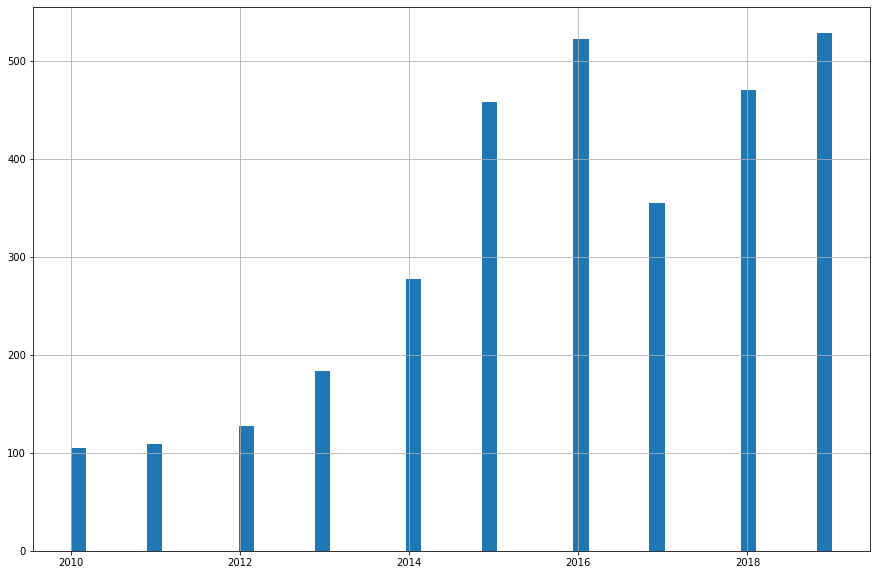

In [47]:
data.loc[data['box_office'].isna() == False, 'year_start_date'].hist(bins=50, figsize=(15, 10));

Вывод: 

Доля фильмов с указанной информацией о прокате в кинотеатрах составляет около 42%. 

По гистограмме распределения количества фильмов с указанной информацией о прокате в кинотеатрах по годам виден рост числа фильмов с 2010 по 2016 год и повторный рост их числа после резкого спада в 2017 году.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

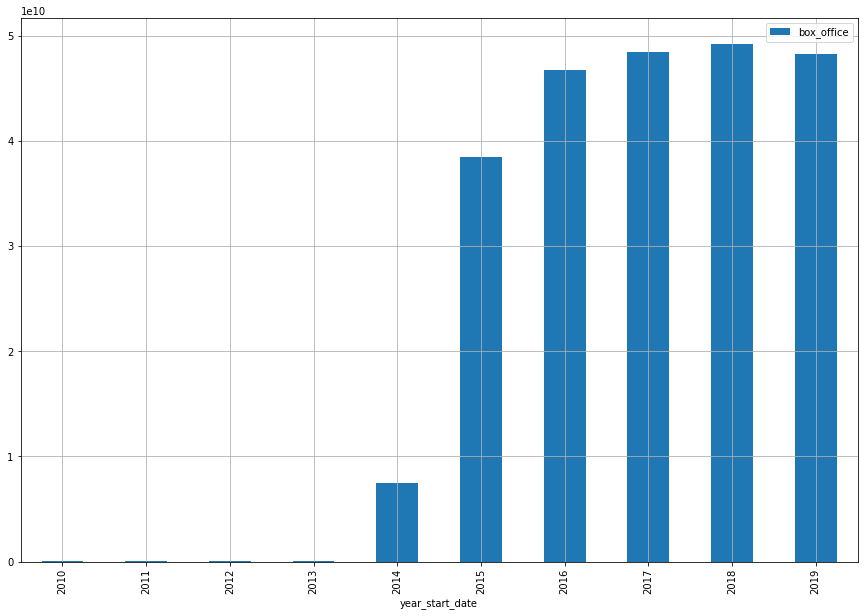

In [48]:
(
    data.pivot_table(index='year_start_date', values='box_office', aggfunc = ('sum'))
    .plot(kind = 'bar', grid=True, figsize=(15, 10))
);

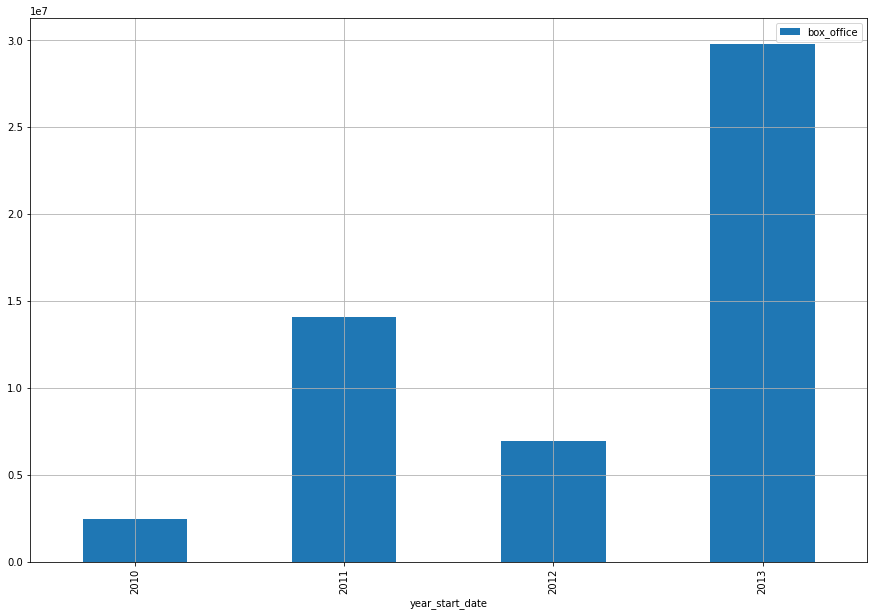

In [49]:
(
    data.query('year_start_date < 2014').pivot_table(index='year_start_date', values='box_office', aggfunc = ('sum'))
    .plot(kind = 'bar', grid=True, figsize=(15, 10))
);

Вывод:

Сумма сборов колебалась в пределах 15 млн. рублей в период 2010-2012 годов, затем к 2014 году резко возросла почти до 700 млн. рублей. Повторный скачок наблюдается в 2015 году, и затем сумма сборов колеблется около 50 млрд. рублей. Минимальная сумма сборов достигнута в 2010 году, максимальная же - в 2018.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [50]:
data.pivot_table(index='year_start_date', values='box_office', aggfunc = ('mean', 'median'))

,mean,median
year_start_date,,
2010,2.313004e+04,1700.00
2011,1.293832e+05,3000.00
2012,5.433924e+04,5660.00
2013,1.619549e+05,3522.50
2014,2.674359e+07,18137.50
2015,8.393862e+07,4784781.50
2016,8.937345e+07,3776087.56
2017,1.365018e+08,9919415.00
2018,1.045690e+08,8751895.75


Вывод:

Были рассчитаны средняя и медианная суммы сборов для каждого года, после чего оформлены в сводную таблицу.

Минимальные среднее и медианное значения получены для 2010 года, максимальные - для 2017 года.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?

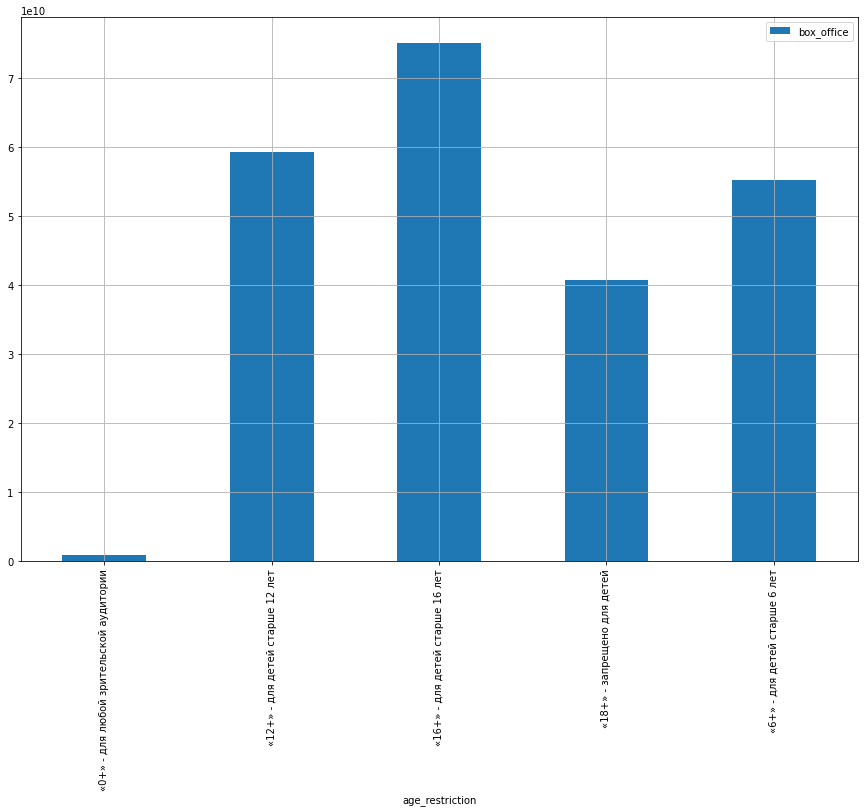

In [51]:
(
    data.query('year_start_date >= 2015').pivot_table(index='age_restriction', values='box_office', aggfunc = ('sum'))
    .plot(kind = 'bar', grid=True, figsize=(15, 10))
);

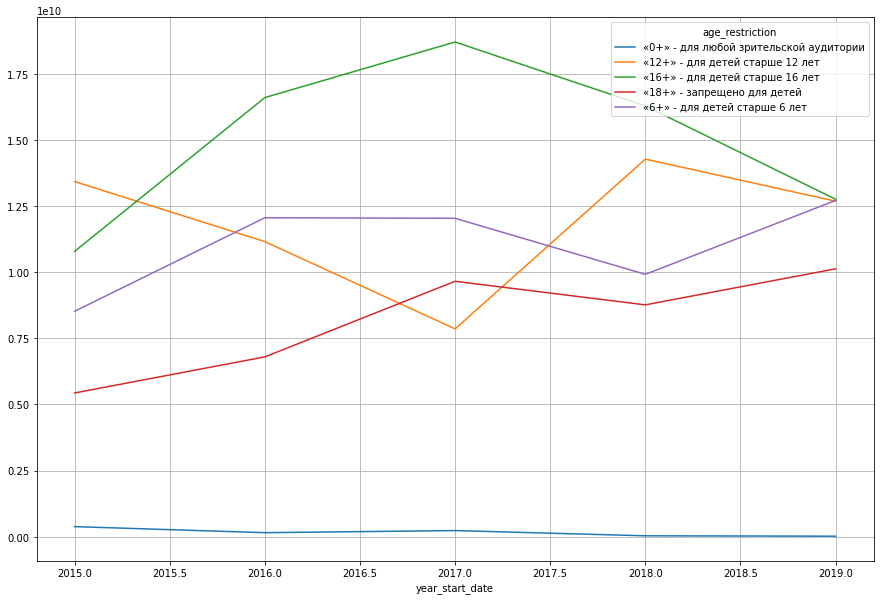

In [52]:
(
    data.query('year_start_date >= 2015')
    .pivot_table(index='year_start_date', columns='age_restriction', values='box_office', aggfunc = ('sum'))
    .plot(grid=True, figsize=(15, 10))
);

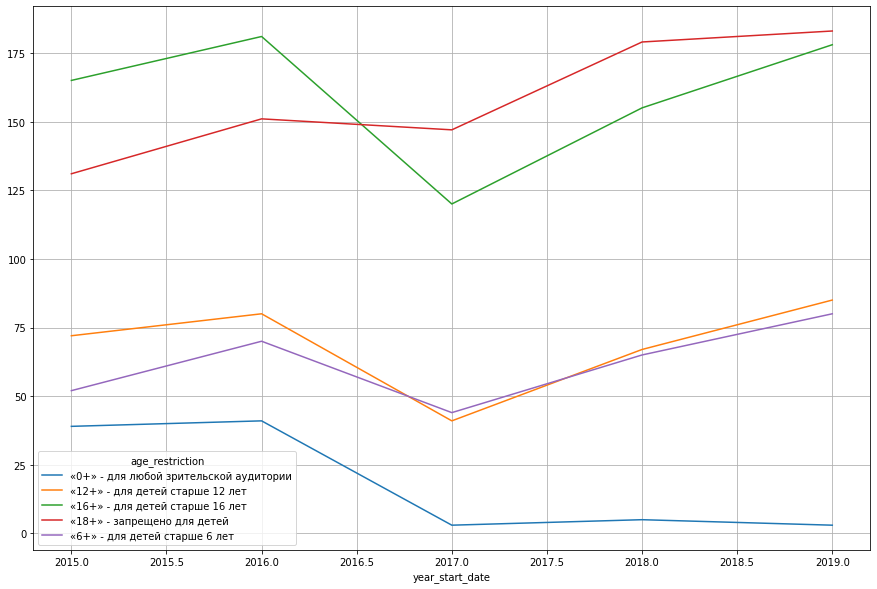

In [53]:
(
    data.query('year_start_date >= 2015')
    .pivot_table(index='year_start_date', columns='age_restriction', values='box_office', aggfunc = ('count'))
    .plot(grid=True, figsize=(15, 10))
);

Вывод:

По гистограмме распределения кассовых сборов по возрастным категориям видно, что в период с 2015 по 2019 год больше всего сборы у фильмов с возрастным ограничением 16+.

Из графика зависимости сборов фильмов каждой возрастной категории по годам видно, что сборы фильмов категории 16+ росли с 2015 по 2017, а затем стали уменьшаться.
Относительно фильмов для других категорий фильмы 16+ стабильно собирают больше денег, незначительно уступив фильмам 12+ в первой половине 2015 года.

Можно предположить, что это связано с тем, что основная аудитория кинотеатров - люди в возрасте от 16 до 18 лет и старше 18 лет, а больше всего фильмов снимают, как правило, для аудитории 16+ (что подтверждает график количества фильмов каждой возрастной категории, вышедших в прокат), что способствует росту просмотров фильмов соответствующей категории и, как следствие, их сборов.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку


In [54]:
data['support'] = data['nonrefundable_support'] + data['refundable_support']

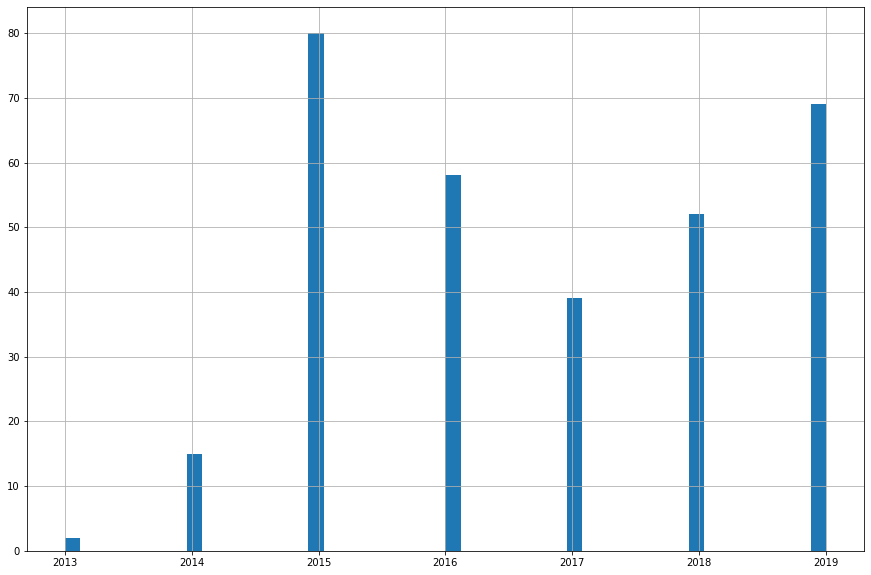

In [55]:
data.loc[data['support'].isna() == False, 'year_start_date'].hist(bins=50, figsize=(15, 10));

Наибольшее количество фильмов, выпущенных при финансовой поддержке государства, выщло в прока в 2015 году, наименьшее - в 2013. До 2013 года государство поддерку не оказывало.

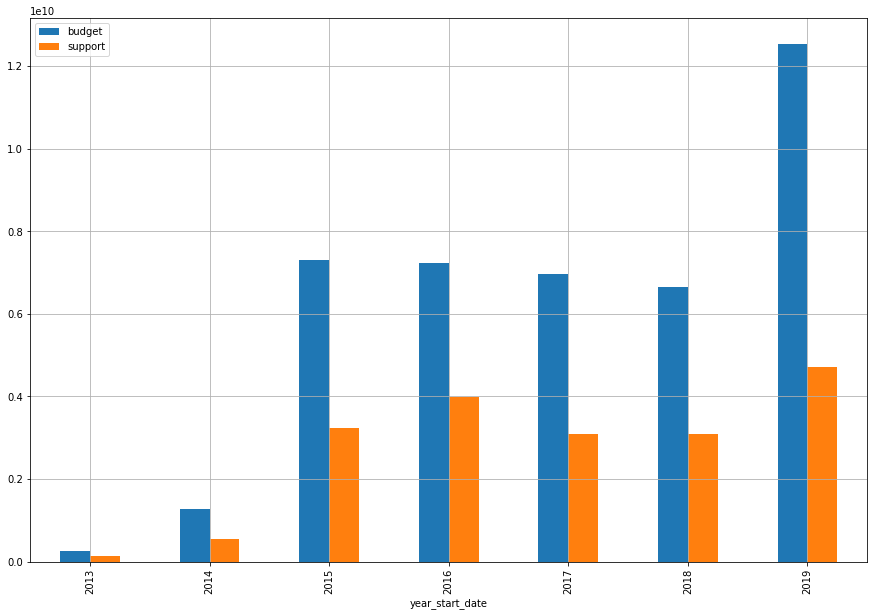

In [56]:
(
    data.query('year_start_date >= 2013')
    .pivot_table(index='year_start_date', values=['support', 'budget'], aggfunc = ('sum'))
    .plot(kind = 'bar', grid=True, figsize=(15, 10))
);

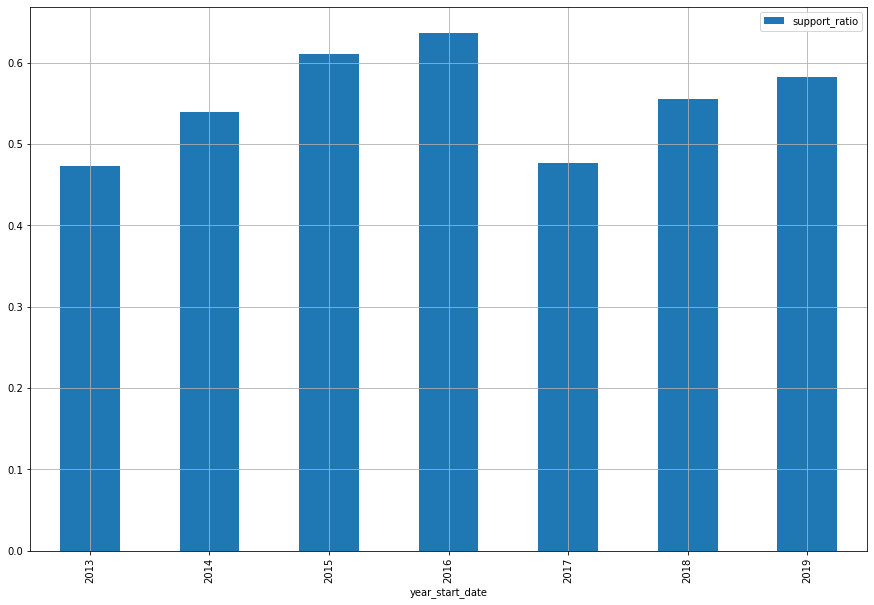

In [57]:
(
    data.query('year_start_date >= 2013')
    .pivot_table(index='year_start_date', values='support_ratio', aggfunc = 'median')
    .plot(kind = 'bar', grid=True, figsize=(15, 10))
);

Доля поддержки по годам примерно одинаковая и колеблется в районе 50% от суммы бюджета фильма.
Наибольшая суммарная поддержка оказана в 2019 году, тогда же фильмы имели наибольший суммарный бюджет.
Наименьшая поддержка оказана в 2010 году, тогда же фильмф имели наименьший суммарный бюджет.

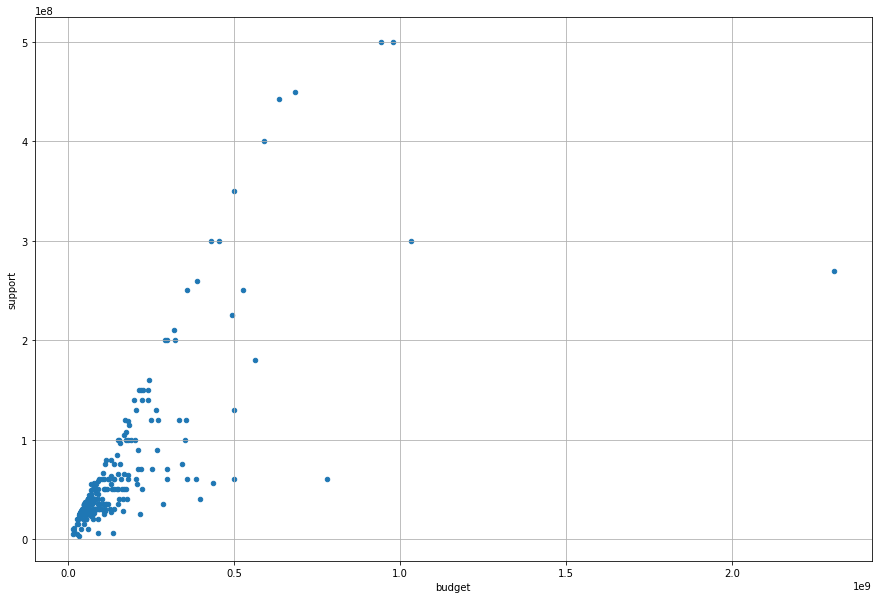

In [58]:
data.plot(grid=True, figsize=(15, 10), kind = 'scatter', y = 'support', x = 'budget');

Чем больше поддержка государства, тем больше бюджет фильмов.

In [59]:
(
    data.pivot_table(index='type', values='support', aggfunc = ('sum'))
    .sort_values(by = 'support', ascending = False)
)

,support
type,
Художественный,1.690420e+10
Анимационный,1.901520e+09
Документальный,3.000000e+06
Музыкально-развлекательный,0.000000e+00
Научно-популярный,0.000000e+00
Прочие,0.000000e+00


Наибольшая поддержка оказывается художественным фильмам, наименьшая - документальным.

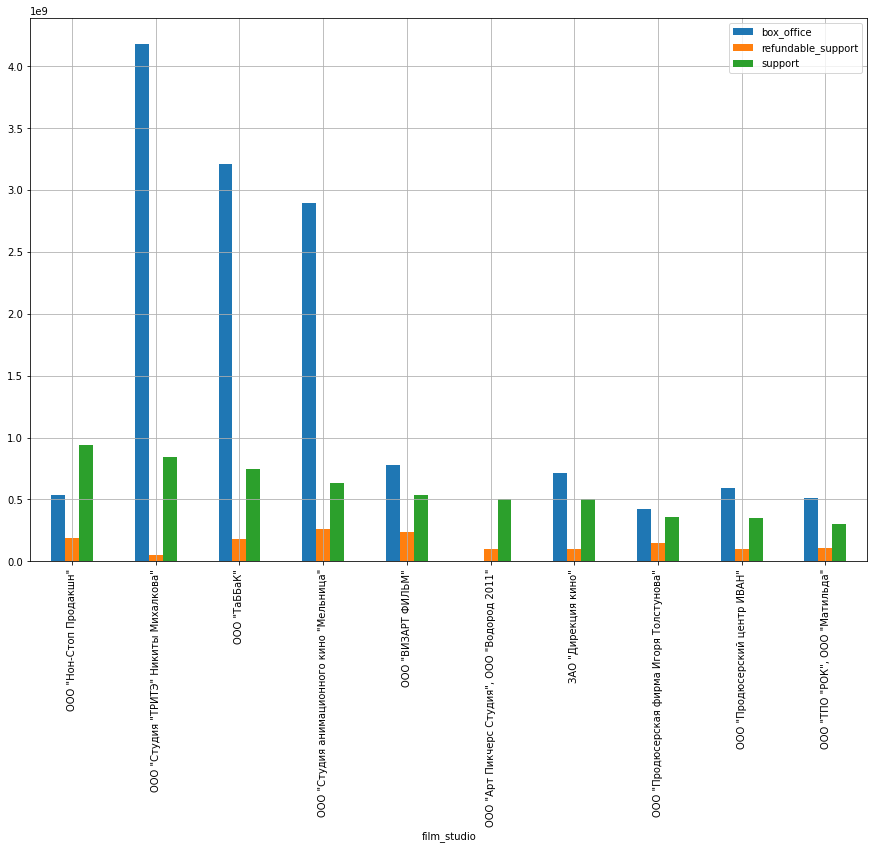

In [60]:
(
    data.pivot_table(index='film_studio', values=['support', 'box_office', 'refundable_support'], aggfunc = ('sum'))
    .sort_values(by = 'support', ascending = False).head(10)
    .plot(kind = 'bar', grid=True, figsize=(15, 10))
);

Больше всего поддржки государство оказывает студии ООО"Нон-Стоп Продакшн", при этом наибольшие кассовые сборы обеспечивает студия ООО"Студия "ТРИТЭ" Никиты Михалкова", при этом она же получает больше прибыли после возврата возмещаемой части поддержки. Получают поддержку, но не могут ее возместить из-за отсутствия кассовых сборов ООО"Арт Пикчерс Студия" и ООО"Водород 2011".

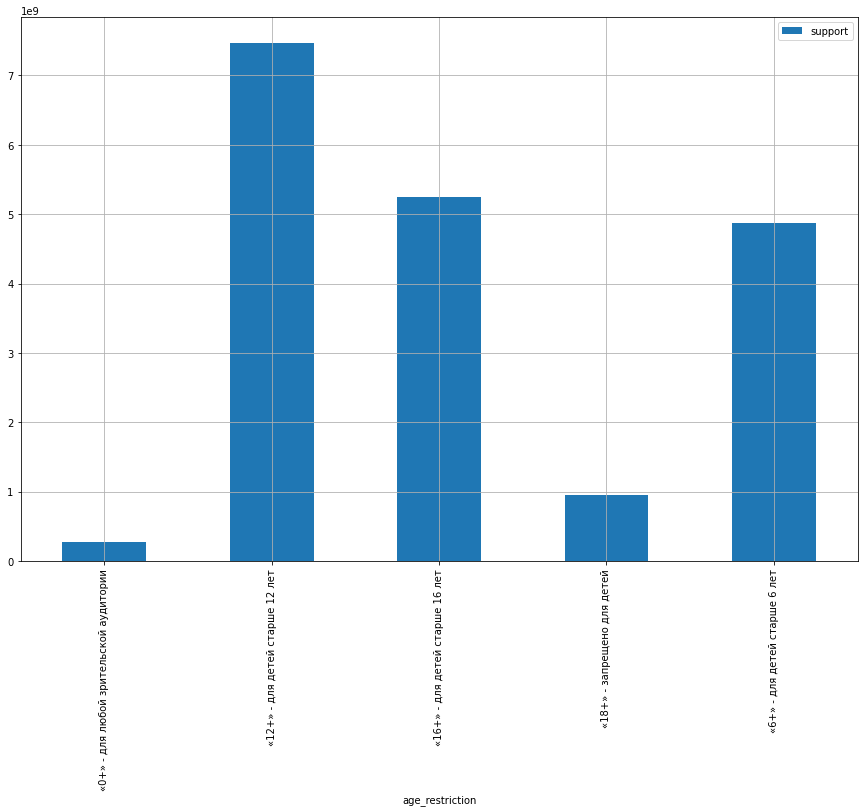

In [61]:
(
    data.pivot_table(index='age_restriction', values='support', aggfunc = ('sum'))
    .plot(kind = 'bar', grid=True, figsize=(15, 10))
);

Больше всего денег государство выделяет на съемки фильмов категории 12+, меньше всего на фильмы 0+.

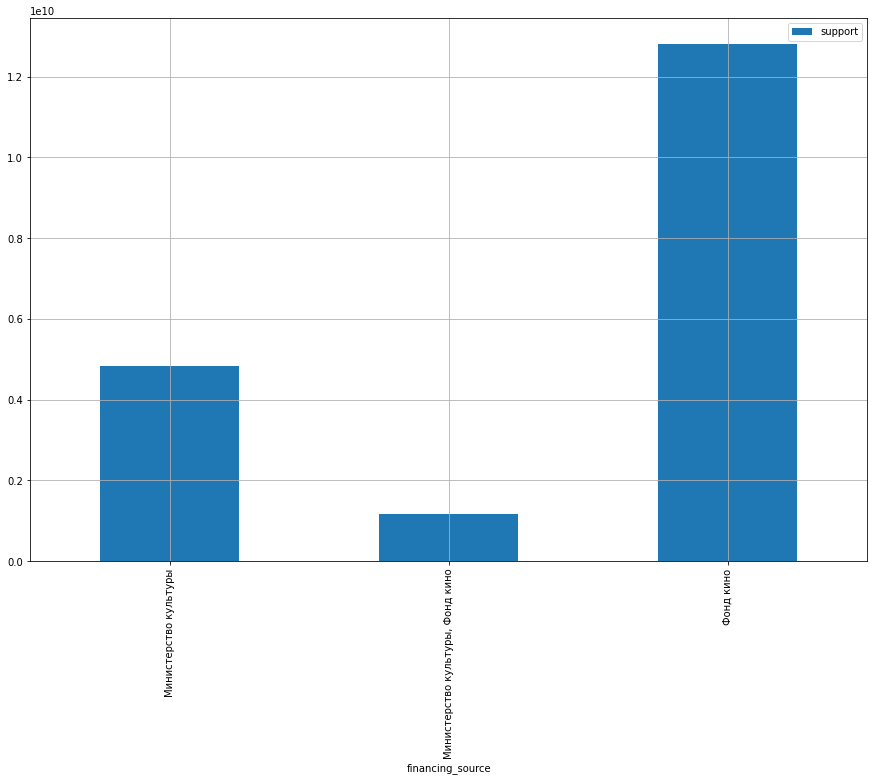

In [62]:
(
    data.pivot_table(index='financing_source', values='support', aggfunc = ('sum'))
    .plot(kind = 'bar', grid=True, figsize=(15, 10))
);

Чаще всего фильмы финансирует Фонд кино, реже - Министерство культуры. Совместное финансирование Министерства культуры и Фонда кино получают меньше всего фильмов.

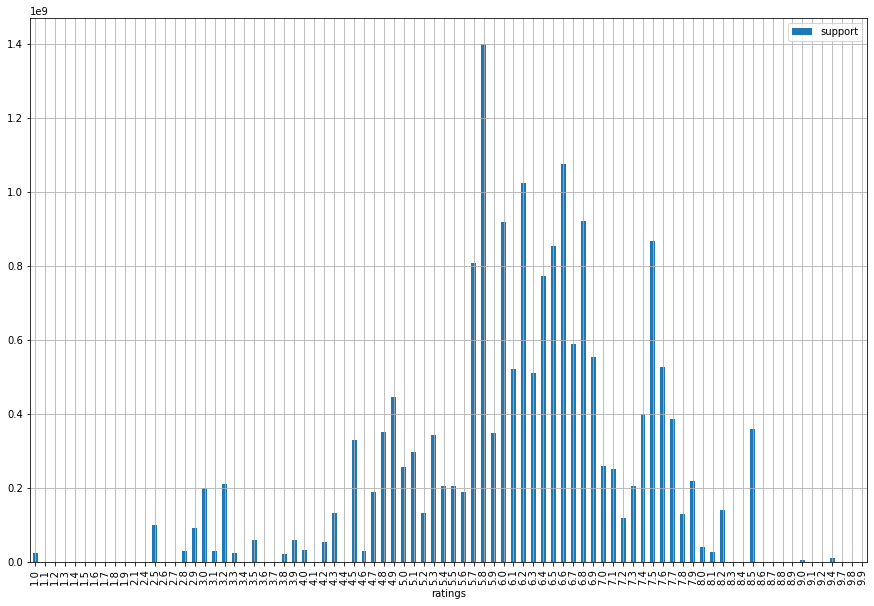

In [63]:
(
    data.pivot_table(index='ratings', values='support', aggfunc = ('sum'))
    .plot(grid=True, figsize=(15, 10), kind = 'bar')
);

Финасируемые государством фильмы чаще всего имеют рейтинг 5,8 - 6,6.

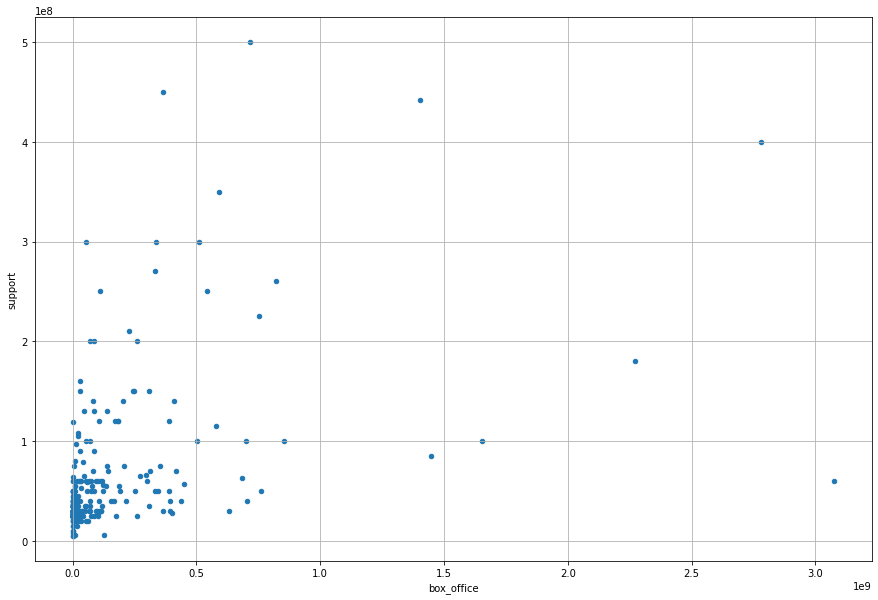

In [64]:
data.plot(grid=True, figsize=(15, 10), kind = 'scatter', y = 'support', x = 'box_office');

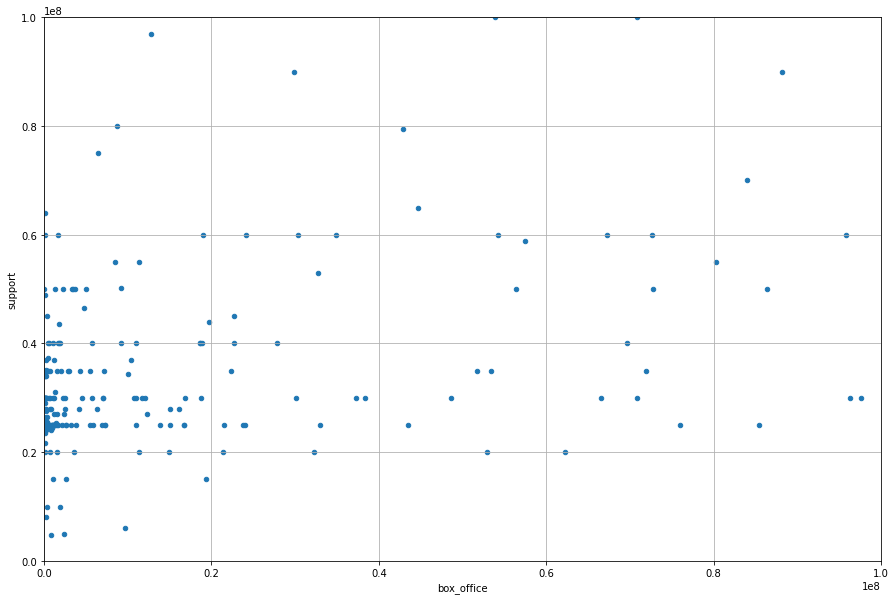

In [65]:
data.plot(grid=True, figsize=(15, 10), kind = 'scatter', y = 'support', x = 'box_office', ylim = (0, 100000000), xlim = (0, 100000000));

Зависимости между объемом финансовой поддержки и величиной кассовых сборов не наблюдается.

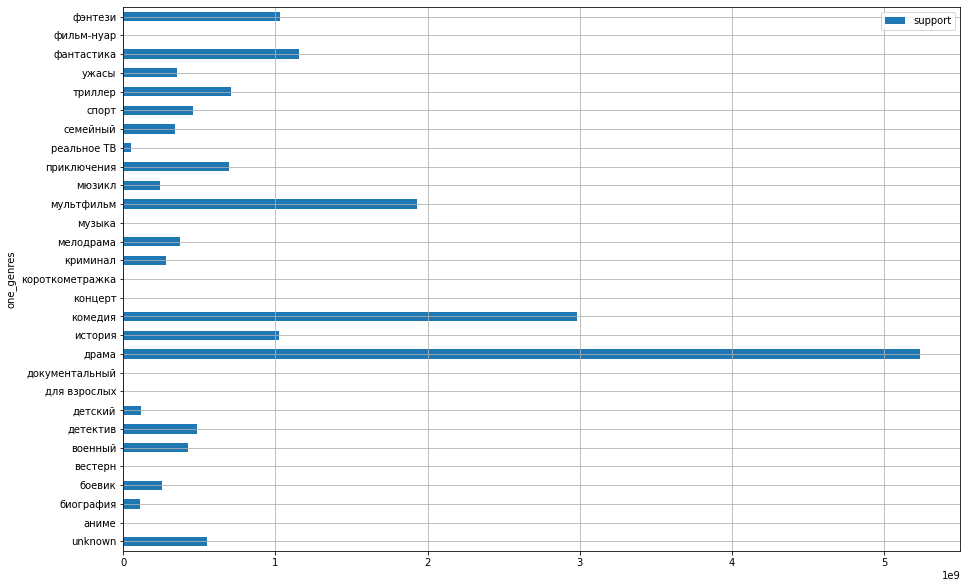

In [66]:
(
    data.pivot_table(index='one_genres', values='support', aggfunc = ('sum'))
    .plot(kind = 'barh', grid=True, figsize=(15, 10))
);

Чаще всего оказывают поддержку фильмам в жанрах драма, комедия и мультфильмам.

Вывод:

Были построены графики, гистограммы и сводные таблицы для выявления зависимостей.

### Шаг 5. Напишите общий вывод

В данном проекте были исследованы датасеты со статистикой рынка российского кинопроката. Данные датасеты были объединены в один датасет, который был предобработан: были заполнены пропущенные значения, были обработаны аномальные значения, были изменены типы данных, были найдены и заменены дубликаты, были найдены и удалены аномалии в категориальных и количественных значениях, были сформированы новые столбцы. На основе обработанного датасета были сформулированы выводы о зависимостях на рынке кинопроката:

- Доля фильмов с указанной информацией о прокате в кинотеатрах составляет около 42%. 

- По гистограмме распределения количества фильмов с указанной информацией о прокате в кинотеатрах по годам виден рост числа фильмов с 2010 по 2016 год и повторный рост их числа после резкого спада в 2017 году.

- Сумма сборов колебалась в пределах 15 млн. рублей в период 2010-2012 годов, затем к 2014 году резко возросла почти до 700 млн. рублей. Повторный скачок наблюдается в 2015 году, и затем сумма сборов колеблется около 50 млрд. рублей. Минимальная сумма сборов достигнута в 2010 году, максимальная же - в 2018.

- Были рассчитаны средняя и медианная суммы сборов для каждого года, после чего оформлены в сводную таблицу. Минимальные среднее и медианное значения получены для 2010 года, максимальные - для 2017 года.

- По гистограмме распределения кассовых сборов по возрастным категориям видно, что в период с 2015 по 2019 год больше всего сборы у фильмов с возрастным ограничением 16+.

- Из графика зависимости сборов фильмов каждой возрастной категории по годам видно, что сборы фильмов категории 16+ росли с 2015 по 2017, а затем стали уменьшаться. Относительно фильмов для других категорий фильмы 16+ стабильно собирают больше денег, незначительно уступив фильмам 12+ в первой половине 2015 года.

- Можно предположить, что это связано с тем, что основная аудитория кинотеатров - люди в возрасте от 16 до 18 лет и старше 18 лет, а больше всего фильмов снимают, как правило, для аудитории 16+ (что подтверждает график количества фильмов каждой возрастной категории, вышедших в прокат), что способствует росту просмотров фильмов соответствующей категории и, как следствие, их сборов.

- Наибольшее количество фильмов, выпущенных при финансовой поддержке государства, выщло в прока в 2015 году, наименьшее - в 2013. До 2013 года государство поддерку не оказывало.

- Доля поддержки по годам примерно одинаковая и колеблется в районе 50% от суммы бюджета фильма. Наибольшая суммарная поддержка оказана в 2019 году, тогда же фильмы имели наибольший суммарный бюджет. Наименьшая поддержка оказана в 2010 году, тогда же фильмф имели наименьший суммарный бюджет.

- Чем больше поддержка государства, тем больше бюджет фильмов.

- Наибольшая поддержка оказывается художественным фильмам, наименьшая - документальным.

- Больше всего поддржки государство оказывает студии ООО"Нон-Стоп Продакшн", при этом наибольшие кассовые сборы обеспечивает студия ООО"Студия "ТРИТЭ" Никиты Михалкова", при этом она же получает больше прибыли после возврата возмещаемой части поддержки. Получают поддержку, но не могут ее возместить из-за отсутствия кассовых сборов ООО"Арт Пикчерс Студия" и ООО"Водород 2011".

- Больше всего денег государство выделяет на съемки фильмов категории 12+, меньше всего на фильмы 0+.

- Чаще всего фильмы финансирует Фонд кино, реже - Министерство культуры. Совместное финансирование Министерства культуры и Фонда кино получают меньше всего фильмов.

- Финасируемые государством фильмы чаще всего имеют рейтинг 5,8 - 6,6.

- Зависимости между объемом финансовой поддержки и величиной кассовых сборов не наблюдается.

- Чаще всего оказывают поддержку фильмам в жанрах драма, комедия и мультфильмам.
